**Required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### 1.Loading the data

In [3]:
import io
url = 'https://raw.githubusercontent.com/Dharshana03/Wine_quality_prediction/main/Data/whitewine-classification.csv'
white_wine = pd.read_csv(url)

**General Preprocessing**

In [4]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  goodwine              4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [107]:
white_wine.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,goodwine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,0


In [108]:
white_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,goodwine
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.216415
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.411842
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,0.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


### 2. Exploring the distribution of the target variable

0.22


<Axes: >

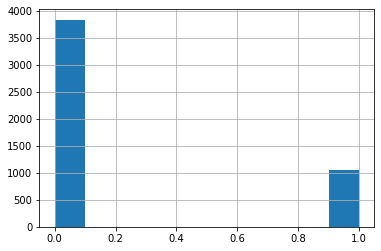

In [109]:
print(round(white_wine.goodwine.mean(),2))
white_wine.goodwine.hist()

The target variable "goodwine" has mean of 0.21 which suggests that there are 21% of positive cases(good wine) and 79% of negative cases(bad wine). This is an unbalanced dataset.

### 3. Assessing if there are any missing values using heatmap

<Axes: >

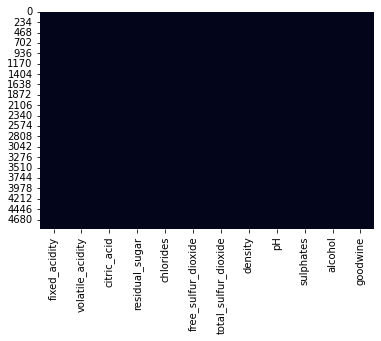

In [110]:
sns.heatmap(white_wine.isnull(),cbar=False)

### 4. Exploring the information value and distribution of features using the pairplot


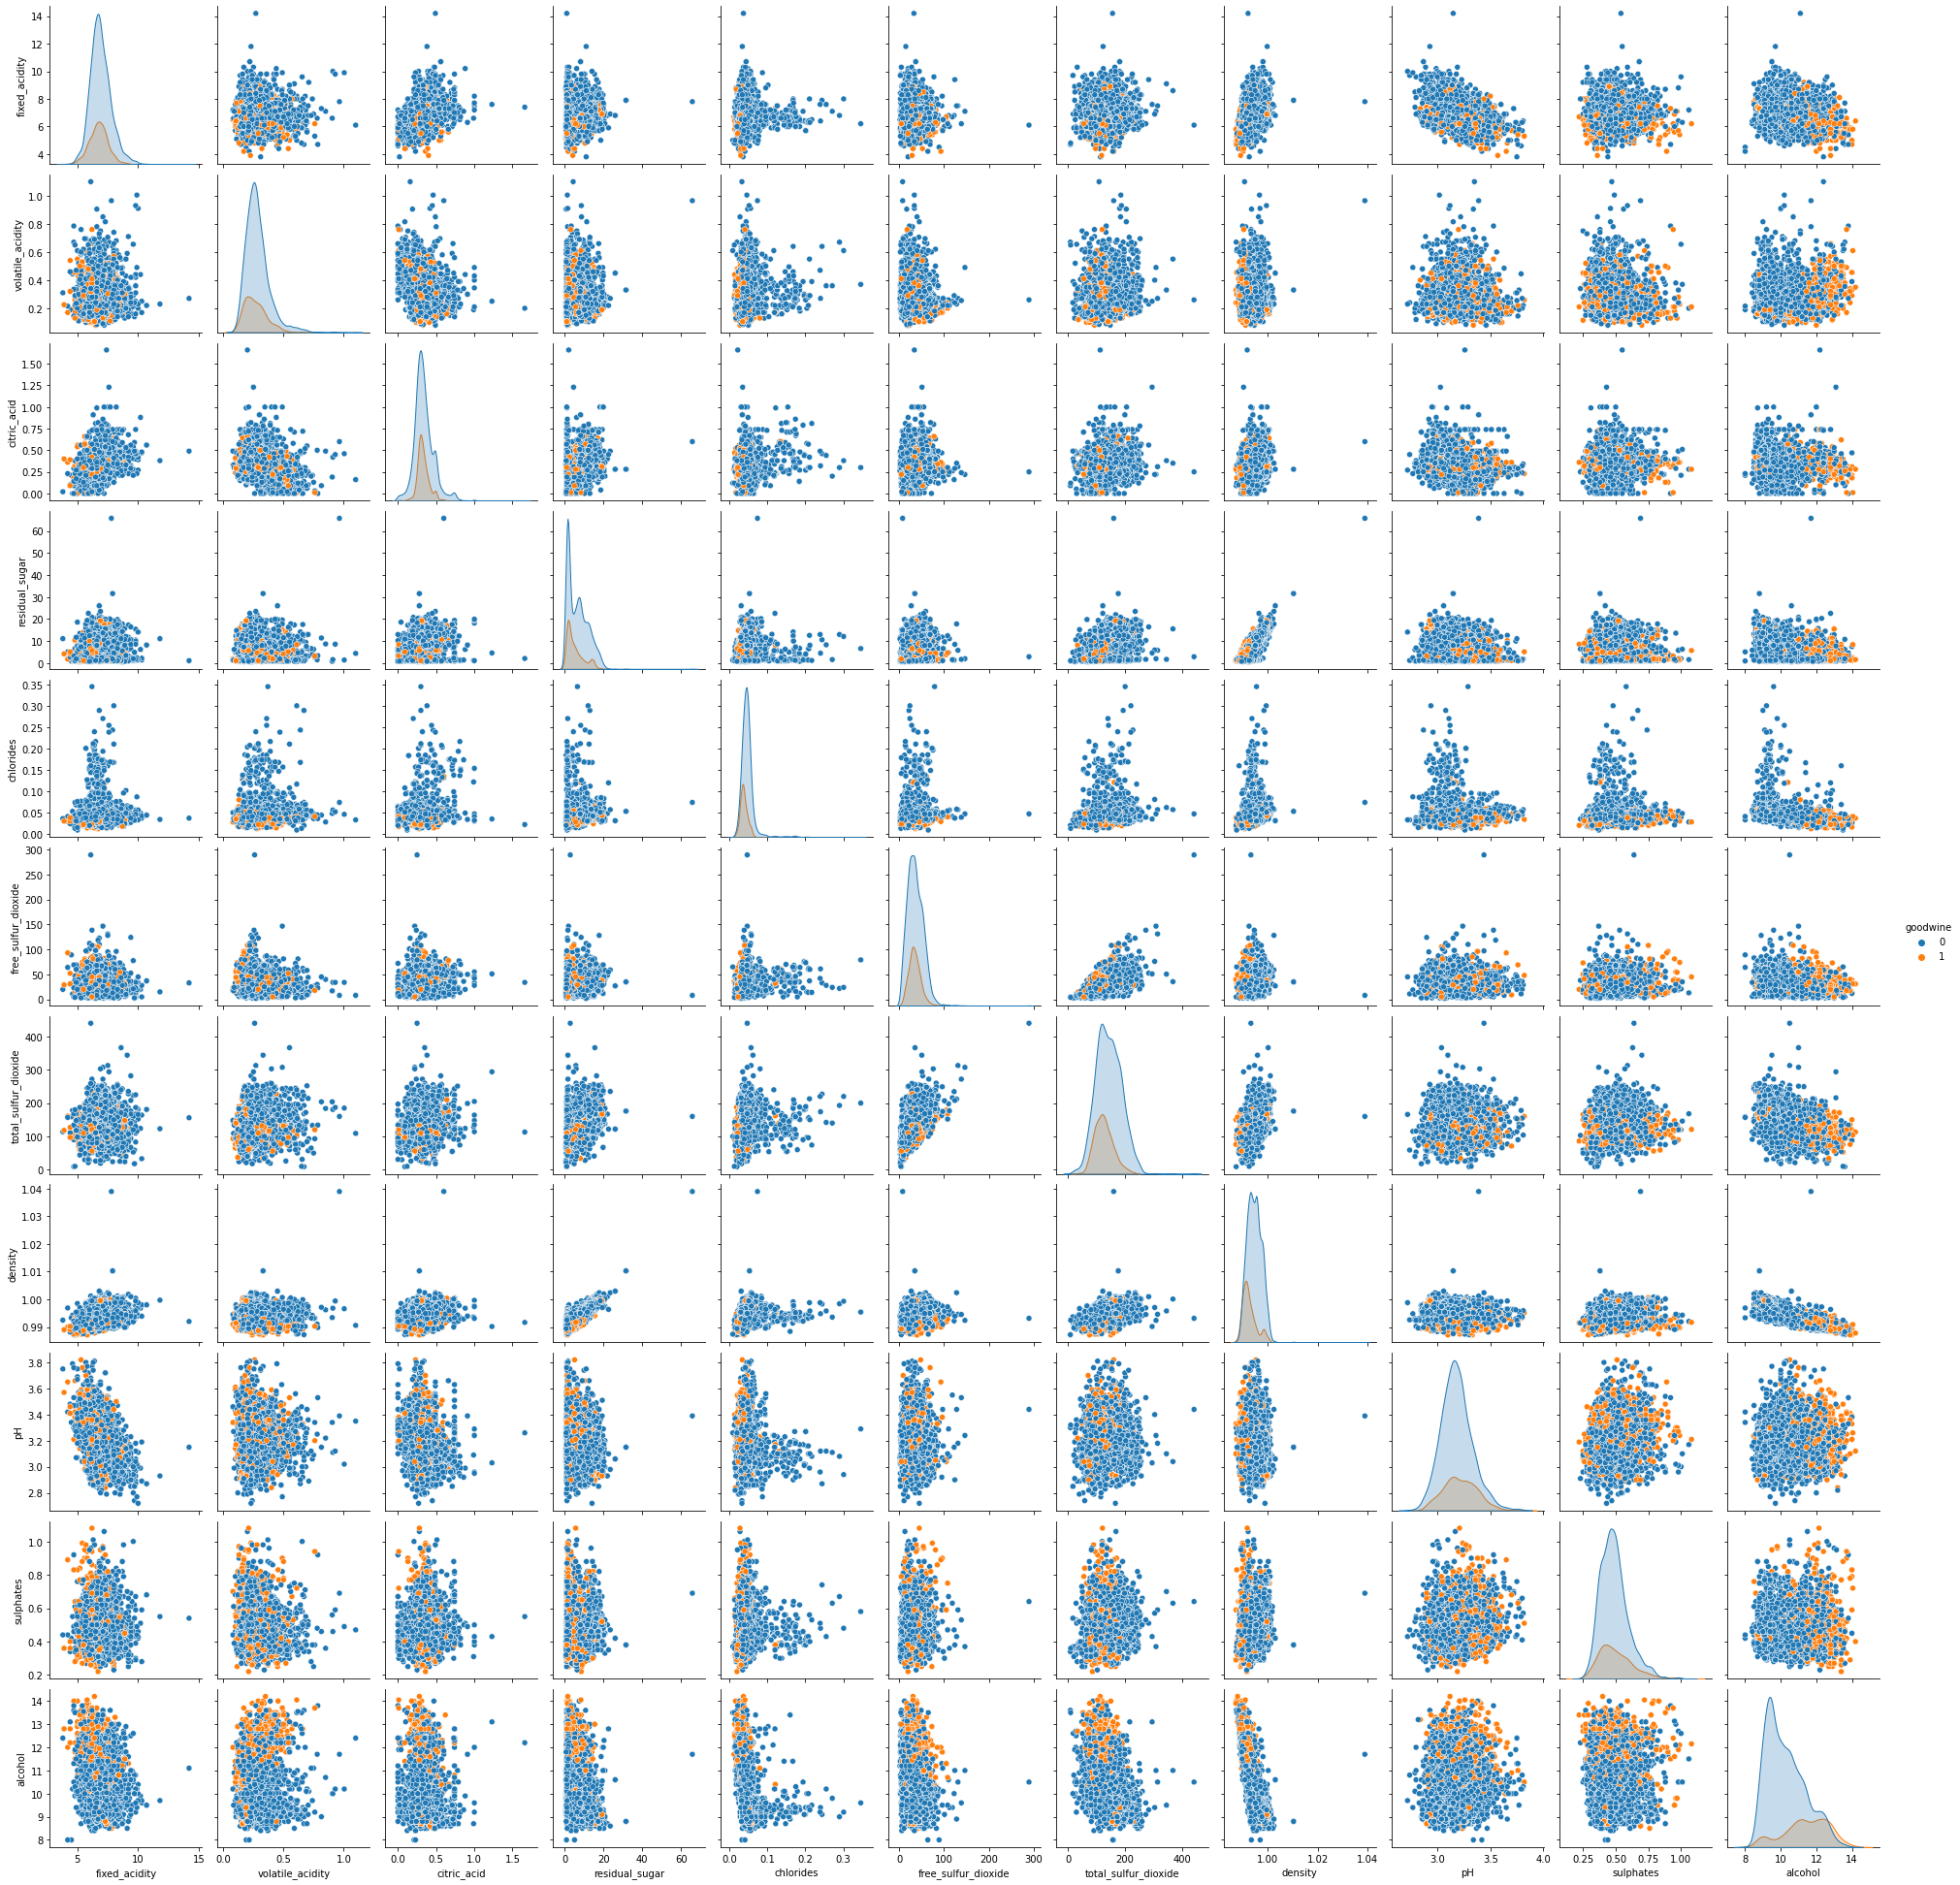

In [111]:
sns.pairplot(white_wine, hue = 'goodwine')


### 5.1 Developing a Logistic Regression model to predict the target variable.

In [112]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [113]:
X = white_wine.drop('goodwine', axis=1)
y = white_wine['goodwine']

In [114]:
#Method for printing the evaluation metrics 

def metrics_1 (y_test,y_pred):
  print("\nConfusion matrix \n",confusion_matrix(y_test,y_pred),'\n')
  print("\nAccuracy, Recall and Precision \n",classification_report(y_test,y_pred))

In [115]:
#Normalizing the predictors(X variables) for kNN model and logistic model
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)
X_rescaled.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Splitting the 70% of the dataset as training data and 30% of the test data

X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

NameError: name 'X_rescaled' is not defined

In [117]:
logit_model=sm.Logit(y_train,X_train)
logmodel=logit_model.fit()
print(logmodel.summary2())

Optimization terminated successfully.
         Current function value: 0.418831
         Iterations 7
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.189      
Dependent Variable:    goodwine          AIC:               2893.5066  
Date:                  2023-03-26 05:07  BIC:               2961.0436  
No. Observations:      3428              Log-Likelihood:    -1435.8    
Df Model:              10                LL-Null:           -1769.9    
Df Residuals:          3417              LLR p-value:       3.9306e-137
Converged:             1.0000            Scale:             1.0000     
No. Iterations:        7.0000                                          
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
fixed_acidity          7.1191   1.1415  6.2366 0.0000   4.8818 

In [118]:
#dropping the statistically insignificant columns - fixed_acidity, citric_acid, total_sulfur_dioxide and rebuilding the model
X_new = X_rescaled.drop(["fixed_acidity", "citric_acid", "total_sulfur_dioxide"],axis=1)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_new, y, test_size=0.3, random_state=1)

logis_reg_stat=sm.Logit(y_train_log, X_train_log)
logmodel_2=logis_reg_stat.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.424982
         Iterations 7
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.177      
Dependent Variable:    goodwine          AIC:               2929.6766  
Date:                  2023-03-26 05:07  BIC:               2978.7944  
No. Observations:      3428              Log-Likelihood:    -1456.8    
Df Model:              7                 LL-Null:           -1769.9    
Df Residuals:          3420              LLR p-value:       5.6461e-131
Converged:             1.0000            Scale:             1.0000     
No. Iterations:        7.0000                                          
-----------------------------------------------------------------------
                     Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
volatile_acidity     -3.9310   0.5619  -6.9961 0.0000  -5.0323 

#### Running the model with method LogisticRegression from scikit learn package to get all the necessary metrics 

In [119]:
logis_reg = LogisticRegression(solver='liblinear')
logis_reg.fit(X_train_log,y_train_log)
y_pred_log=logis_reg.predict(X_test_log)

logit_roc_auc = roc_auc_score(y_test_log, logis_reg.predict_proba(X_test_log)[:,1])
print("ROC AUC: %0.2f " %logit_roc_auc)

ROC AUC: 0.79 


### 5.2 k Nearest Neighbor

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
#Using Normalized predictors for kNN model (preprocessing for kNN model)
X_rescaled.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


optimum k value is :  40


<Axes: >

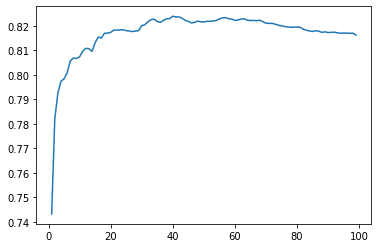

In [122]:
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())

print("optimum k value is : ",cv_scores.index(max(cv_scores))+1)
sns.lineplot(x=range(1,max_K), y=cv_scores)


In [123]:
#Running the kNN model with the optimum k
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
metrics_1(y_test,y_pred_knn)
print('ROC AUC: %0.2f' %roc_auc_score(y_test,knn.predict_proba(X_test)[:,1]))



Confusion matrix 
 [[1072   64]
 [ 218  116]] 


Accuracy, Recall and Precision 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      1136
           1       0.64      0.35      0.45       334

    accuracy                           0.81      1470
   macro avg       0.74      0.65      0.67      1470
weighted avg       0.79      0.81      0.79      1470

ROC AUC: 0.82


Though the optimum k value is 40, cross-validation uses smaller subsamples of data and it can produce lower values of ROC AUC. Thus, I am selecting the optimized k value as 5, and rerunning the model.

In [124]:

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
knn_roc_auc = roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])
print('ROC AUC: %0.2f' %knn_roc_auc)


ROC AUC: 0.83


### 5.3 Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest and other ensemble methods do not require scaling because their splitting is based on values. Using unscaled predictors to split the data
# reference - https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf#:~:text=Stack%20Overflow%3A%20(1)%20No,does%20not%20require%20feature%20scaling.

X_train_ens, X_test_ens, y_train_ens, y_test_ens = train_test_split(X, y, test_size=0.3, random_state=1)


In [126]:
from sklearn import metrics
# Random Forest

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train_ens,y_train_ens)

y_pred_rf = rf_model.predict(X_test_ens)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_ens)[:,1])
print("ROC AUC %0.2f" %rf_roc_auc)

ROC AUC 0.85


In [127]:
# Boosted tree model

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train_ens,y_train_ens)

y_pred_bt = bt_model.predict(X_test_ens)
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test_ens)[:,1])
print('ROC AUC: %0.2f' %bt_roc_auc)


ROC AUC: 0.84


### 6. Assessing the performance of each model using the following metrics: Recall, Precision, F1, ROC AUC. 

Comparing ROC AUC values all the four classification models built above

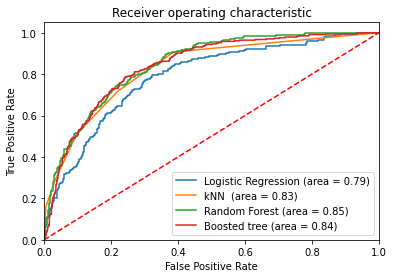

In [128]:
#logistic regression 
log_fpr, log_tpr, log_thresholds = roc_curve(y_test_log, logis_reg.predict_proba(X_test_log)[:,1])

#kNN model
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

#Random Forrest
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test_ens, rf_model.predict_proba(X_test_ens)[:,1])

#Boosted Tree
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test_ens, bt_model.predict_proba(X_test_ens)[:,1])


plt.figure()

plt.plot(log_fpr, log_tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='kNN  (area = %0.2f)' % knn_roc_auc)

plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Random forest has higher ROC AUC value when compared to other models. This denotes that Random forest model can differentiate between the good quality and bad quality wine well. 

In [129]:
print("Logistic Regression model\n")
metrics_1(y_test_log,y_pred_log)
print('ROC AUC: %0.2f' % logit_roc_auc)



Logistic Regression model


Confusion matrix 
 [[1090   46]
 [ 252   82]] 


Accuracy, Recall and Precision 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      1136
           1       0.64      0.25      0.35       334

    accuracy                           0.80      1470
   macro avg       0.73      0.60      0.62      1470
weighted avg       0.77      0.80      0.76      1470

ROC AUC: 0.79


In [130]:
print("kNN model\n")
metrics_1(y_test,y_pred_knn)
print('ROC AUC: %0.2f' %knn_roc_auc)


kNN model


Confusion matrix 
 [[1025  111]
 [ 163  171]] 


Accuracy, Recall and Precision 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1136
           1       0.61      0.51      0.56       334

    accuracy                           0.81      1470
   macro avg       0.73      0.71      0.72      1470
weighted avg       0.80      0.81      0.81      1470

ROC AUC: 0.83


In [131]:
print("Random forest model\n")
metrics_1(y_test_ens,y_pred_rf)
print("ROC AUC %0.2f" %rf_roc_auc)


Random forest model


Confusion matrix 
 [[1107   29]
 [ 242   92]] 


Accuracy, Recall and Precision 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1136
           1       0.76      0.28      0.40       334

    accuracy                           0.82      1470
   macro avg       0.79      0.62      0.65      1470
weighted avg       0.81      0.82      0.78      1470

ROC AUC 0.85


In [132]:
print("Boosted tree model\n")
metrics_1(y_test_ens,y_pred_bt)
print('ROC AUC: %0.2f' %bt_roc_auc)


Boosted tree model


Confusion matrix 
 [[1049   87]
 [ 175  159]] 


Accuracy, Recall and Precision 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1136
           1       0.65      0.48      0.55       334

    accuracy                           0.82      1470
   macro avg       0.75      0.70      0.72      1470
weighted avg       0.81      0.82      0.81      1470

ROC AUC: 0.84


Recall : 

The kNN model performs better when Recall metric is considered - Recall = 0.51 for good quality wine (goodwine = 1). Thus, if the objective is to have less false negative values, less actual good quality wines classified as bad quality, knn model can be considered.

Precision :

Random forest model has the higher precision value when compared to other models for good quality wine, Precision = 0.76. Out of the predicted positive values, if the objective is to predict more True positive and less false positives, Random forest model should be preferred. 

f1-score :    

kNN and Boosted tree models have good f1-score. These models exhibit a good balance between precision and recall. These models can be used for objective where both precision and recall are equally important.

Comments: 

Logistic Regression model is not the best-fit for this dataset as the metrics - Recall, precision, and f1-score is comparatively lesser. 

To conclude, kNN model has better ROC AUC, recall, and f1-score. As kNN models works well for new data, this can best suit the dataset.